<a href="https://colab.research.google.com/github/krjii/cs506_repo/blob/main/Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3

# Learning Objectives


*   To learn the fundamentals of Data Visualization
*   To learn about Matplotlib, Seaborn and Plotly
*   To learn how data visualization will help you to gain a better understanding on your data



**First Iphone Launch (2007)**

https://www.youtube.com/watch?v=MnrJzXM7a6o

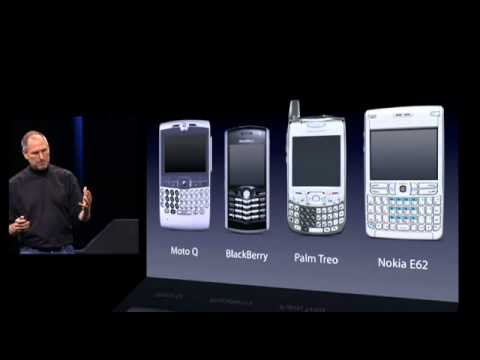

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="MnrJzXM7a6o", height=500, width=700,)

https://www.apple.com/newsroom/pdfs/fy2023-q4/FY23_Q4_Consolidated_Financial_Statements.pdf

<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F5235af77-dcaf-4156-8dcc-ecd611c9ead4_2459x1378.png" width=900>

# Python Image Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
url="https://news.rice.edu/sites/g/files/bxs2656/files/inline-images/lovett-hall-sunset-540px.jpg"
os.system("wget -O rice.jpg {}".format(url))

0

<img src="https://e2eml.school/images/image_processing/three_d_array.png" width=400>

In [ ]:
pic1=Image.open("rice.jpg")
img=np.asarray(pic1)
img.shape

(360, 540, 3)

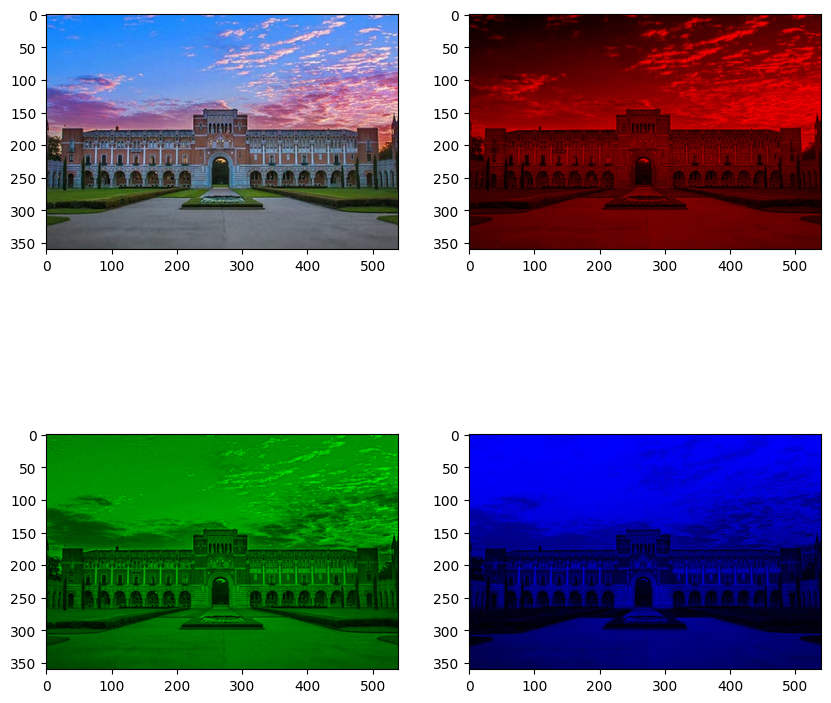

In [ ]:
red=img.copy()
red[:,:,1:]=0
green=img.copy()
green[:,:,0]=0
green[:,:,2]=0
blue=img.copy()
blue[:,:,:2]=0
fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(img)
axs[0,1].imshow(red)
axs[1,0].imshow(green)
axs[1,1].imshow(blue)
plt.show()

In [ ]:
url="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F5235af77-dcaf-4156-8dcc-ecd611c9ead4_2459x1378.png"
os.system("wget -O sankey.png {}".format(url))

0

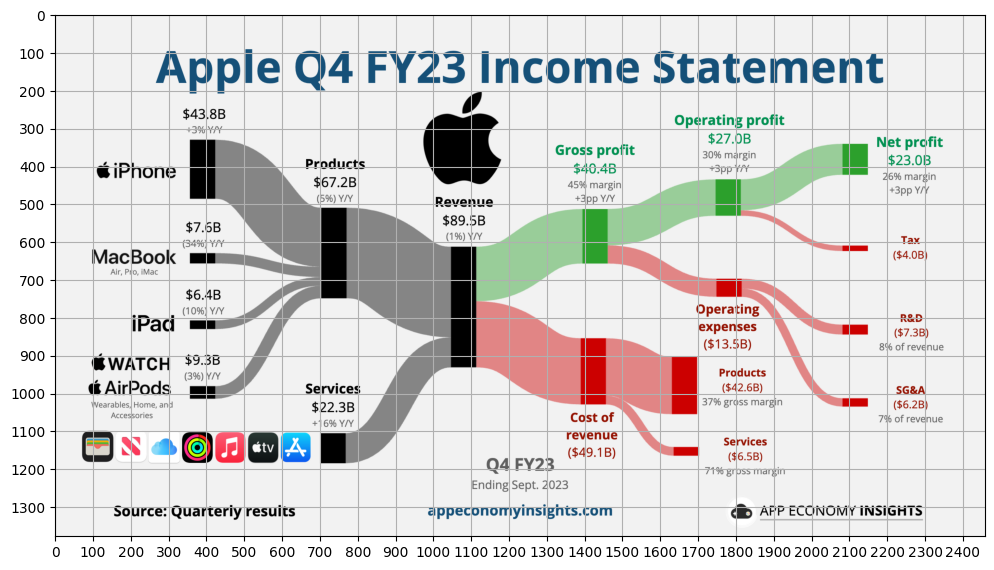

In [ ]:
# Analizing the image
pic=Image.open("sankey.png")
fig, axs = plt.subplots(figsize=(12,8))
axs.imshow(pic)
axs.grid()
#axs.axis("off")
axs.set_xticks(np.arange(0,2500,100))
axs.set_yticks(np.arange(0,1400,100))
plt.show()

In [ ]:
# Nodes locations
max_x=2500
max_y=1400

X=np.array((100, 100, 100, 100, 500, 500, 900,
                               1400, 1400, 2000, 2000, 1800, 1800,
                               2400, 2400, 2400, 2400))
X=X/max_x

Y=np.array((200, 500, 700, 900, 600, 1400, 1000,
                               600, 1100, 300, 800, 1250, 1400,
                               200, 600, 900, 1100))

Y=Y/max_y
Y

array([0.14285714, 0.35714286, 0.5       , 0.64285714, 0.42857143,
       1.        , 0.71428571, 0.42857143, 0.78571429, 0.21428571,
       0.57142857, 0.89285714, 1.        , 0.14285714, 0.42857143,
       0.64285714, 0.78571429])

In [ ]:
import plotly.graph_objects as go

In [ ]:
colors= ['hsl(0,0%,25%)' for n in range(7)] + ['hsl(120,75%,50%)', 'hsl(0,75%,50%)']*2
colors+= ['hsl(0,75%,50%)']*2 + ['hsl(120,75%,50%)'] + ['hsl(0,75%,50%)']*3

nodes_data={"label": ["Iphone", "MacBook", "iPad", "iWatch\nAirPods", "Products", "Services",
                      "Revenue", "Gross Profit", "Cost of\nRevenue", "Operating\nProfit",
                      "Operating\nExpenses", "Cost Products", "Cost Services", "Net Profit",
                      "Tax", "R&D", "SG&A"],
            "color":colors,
            "customdata":[43.8, 7.6, 6.4, 9.3, 67.2, 22.3, 89.5, 40.4, 49.1, 27, 13.5, 42.6,
                 6.5, 23, 4, 7.3, 6.2],
            "x": list(X),
            "y": list(Y),
            'pad':10}  # 10 Pixels

In [ ]:
link_data=[
    {'source': 0, 'target': 4, 'value': 43.8},
    {'source': 1, 'target': 4, 'value': 7.6},
    {'source': 2, 'target': 4, 'value': 6.5},
    {'source': 3, 'target': 4, 'value': 9.3},
    {'source': 4, 'target': 6, 'value': 67.2},
    {'source': 5, 'target': 6, 'value': 22.3},
    {'source': 6, 'target': 7, 'value': 40.4},
    {'source': 6, 'target': 8, 'value': 49.1},
    {'source': 7, 'target': 9, 'value': 27},
    {'source': 7, 'target': 10, 'value': 13.5},
    {'source': 8, 'target': 11, 'value': 42.6},
    {'source': 8, 'target': 12, 'value': 6.5},
    {'source': 9, 'target': 13, 'value': 23},
    {'source': 9, 'target': 14, 'value': 4},
    {'source': 10, 'target': 15, 'value': 7.3},
    {'source': 10, 'target': 16, 'value': 6.2},
]

In [ ]:
sankey=go.Sankey(
    arrangement = "snap",
    node = nodes_data,
    link = dict(
        source=[link['source'] for link in link_data],
        target=[link['target'] for link in link_data],
        value=[link['value'] for link in link_data],
        color=[c.replace("50", "75") if "50" in c else c.replace("25", "75") for c in colors][1:]),
    valuesuffix = "B",

    )

In [ ]:
url_logos=["https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Apple_logo_black.svg/833px-Apple_logo_black.svg.png",
           "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR12QkRY1D5OpoItCFf4_eZ7Ynp1RkjFXmlY3M8r1JS4a-7qVjFMgDCjeWwVtMS8w9Qj60&usqp=CAU",
           "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/MacBook.svg/2560px-MacBook.svg.png",
           "https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Apple_ipad.svg/2560px-Apple_ipad.svg.png",
           "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Apple_Watch_official_logo.svg/1280px-Apple_Watch_official_logo.svg.png",
           "https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/AirPods.svg/1280px-AirPods.svg.png",
           "https://cdn.dribbble.com/users/476946/screenshots/13892314/media/16d5c56969ef0cf453a7a815e62d5bf8.png",
           "https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/ITunes_logo.svg/2039px-ITunes_logo.svg.png",
           "https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/App_Store_%28iOS%29.svg/512px-App_Store_%28iOS%29.svg.png",
           "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/AppleTV.svg/2560px-AppleTV.svg.png"]

In [ ]:
logos_data={"x":[0.5, 0.025, 0.02, 0.02 ,0.02, 0.02,
                 0.06, 0.09, 0.13, 0.19],
            "y":[0.8, 0.7, 0.5, 0.385 ,0.325, 0.25,
                 -0.05, -0.05, -0.05, -0.05],
            "sizex":[0.2, 0.15, 0.075, 0.075, 0.075, 0.075,
                     0.075, 0.075, 0.075, 0.075],
            "sizey":[0.2, 0.15, 0.075, 0.075, 0.075, 0.075,
                     0.075, 0.075, 0.075, 0.075]}

In [ ]:
fig = go.Figure(sankey)

# Adding images(logos)
for n in range(len(url_logos)):
  fig.add_layout_image(
      dict(
          source=url_logos[n],
          x=logos_data["x"][n],
          y=logos_data["y"][n],
          sizex=logos_data["sizex"][n],
          sizey=logos_data["sizey"][n],
          xanchor="right", yanchor="bottom"
      )
  )

fig.update_layout(
    title_text="<b>Apple Q4 FY22 Income Statement</b>",
    title_font_size=40,
    title_x=0.5,
    title_y=0.9,
    font=dict(size=12, color='DarkBlue'),
    paper_bgcolor='white',
    width=1000,
    height=500
)
fig.show()

# NYT activity

https://www.nytimes.com/column/whats-going-on-in-this-graph

## Great example

**Left**: Image from the NYT, **Right**: Image created by student

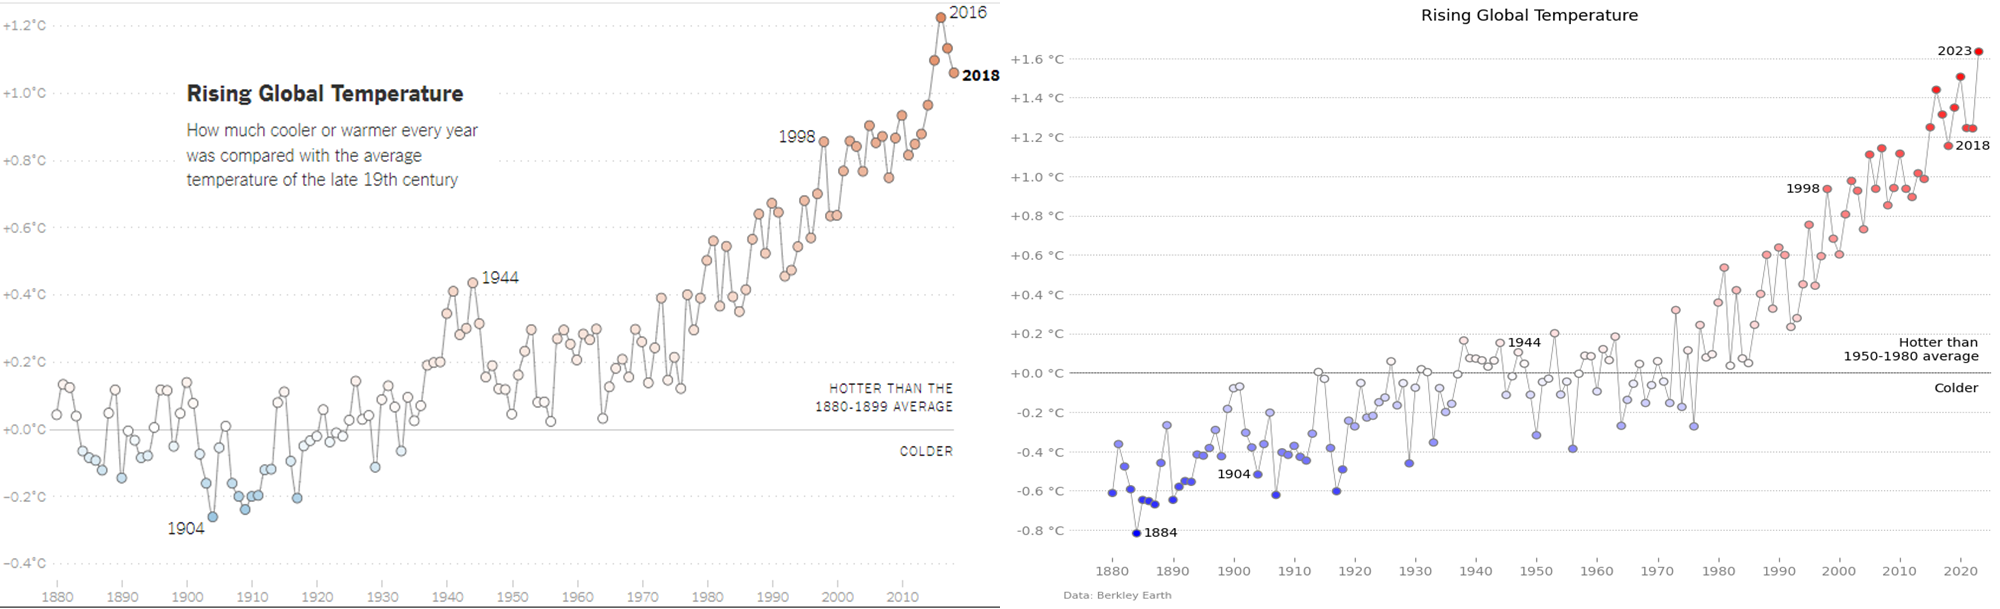

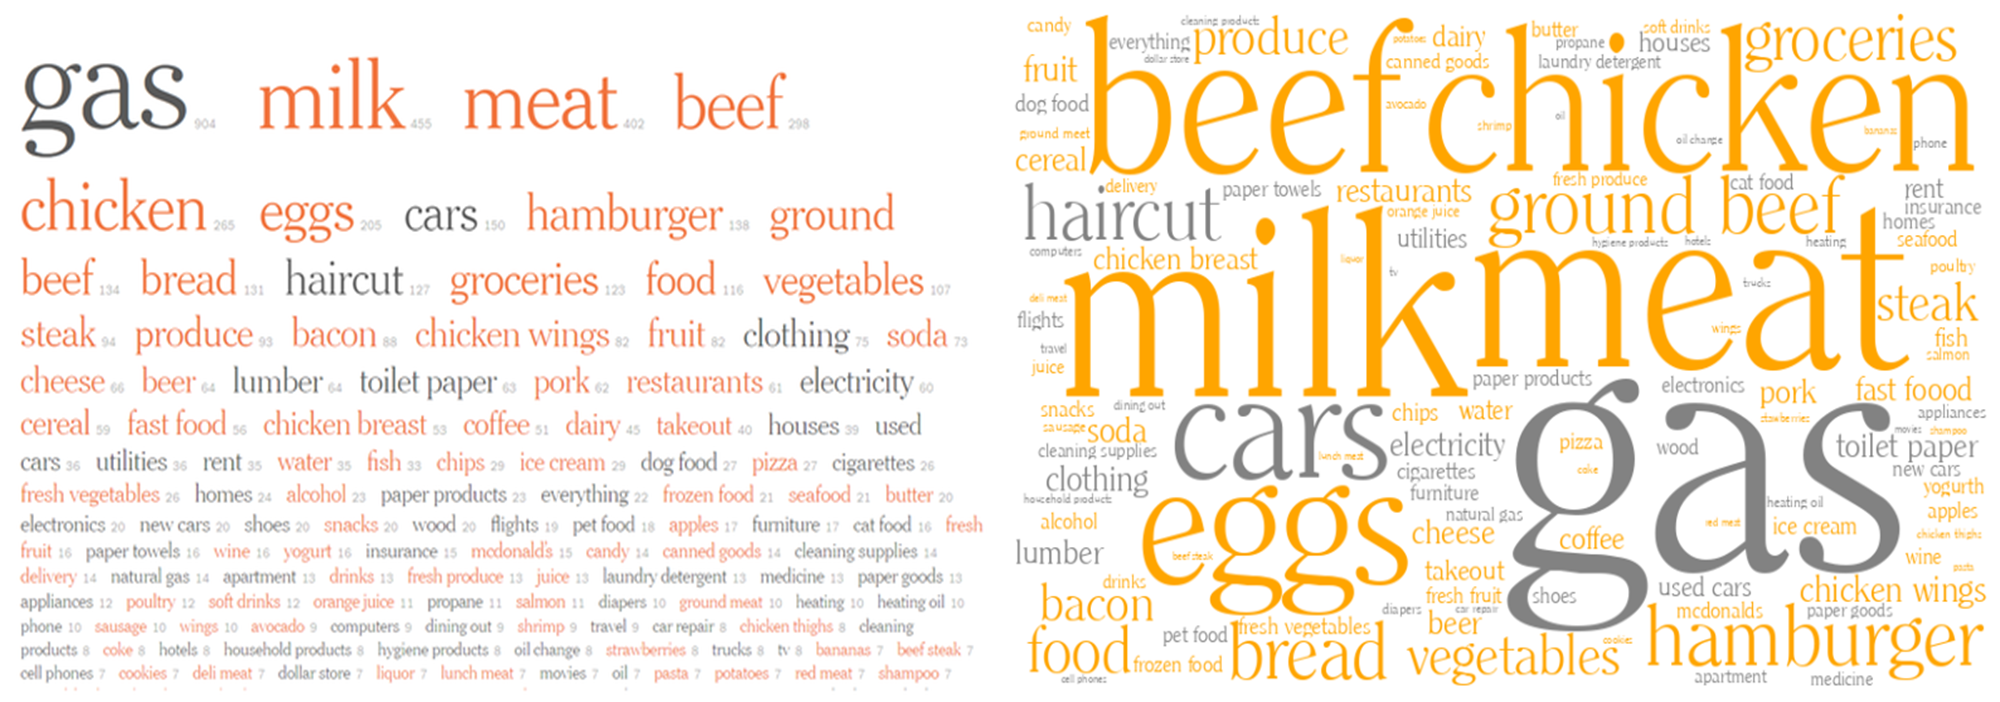

## Candidate for the hall of shame

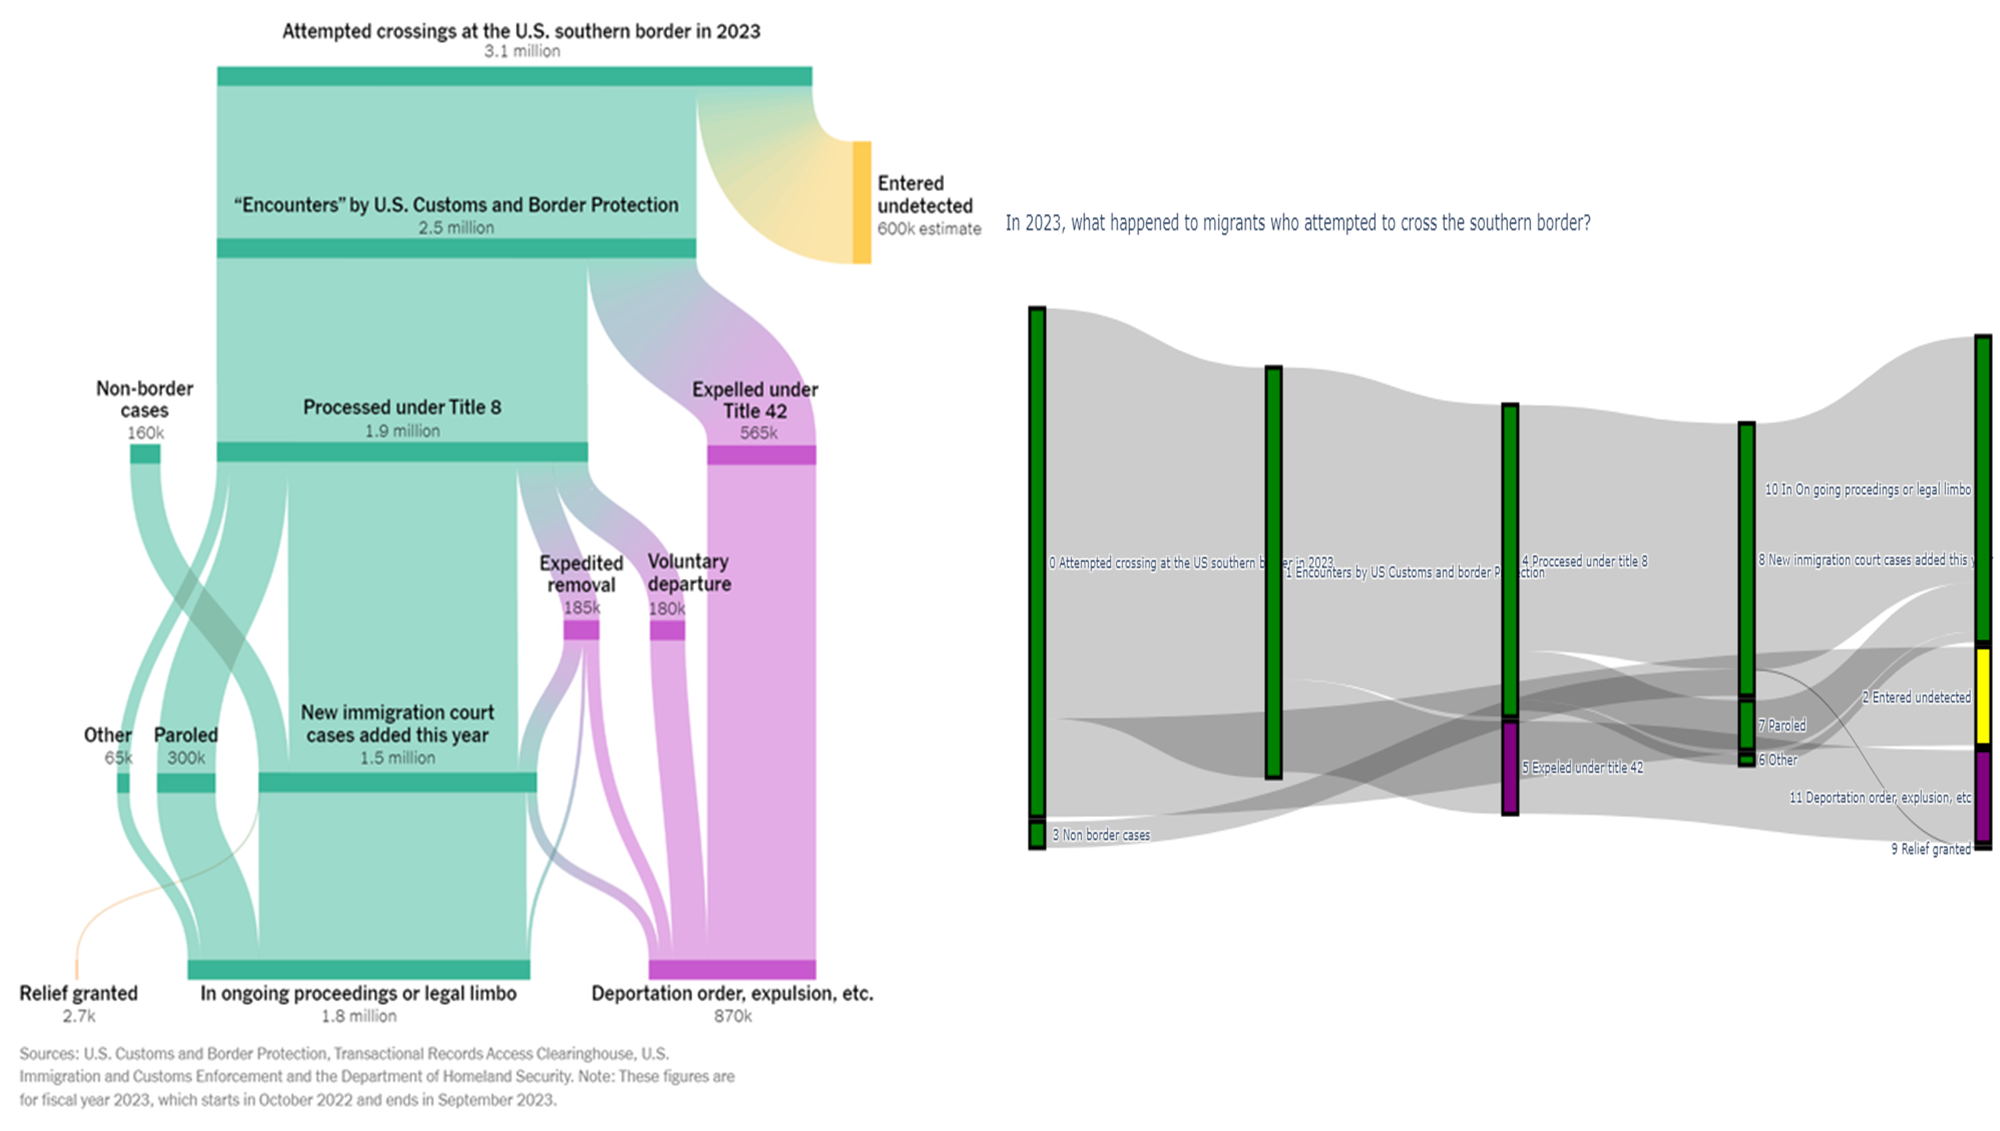

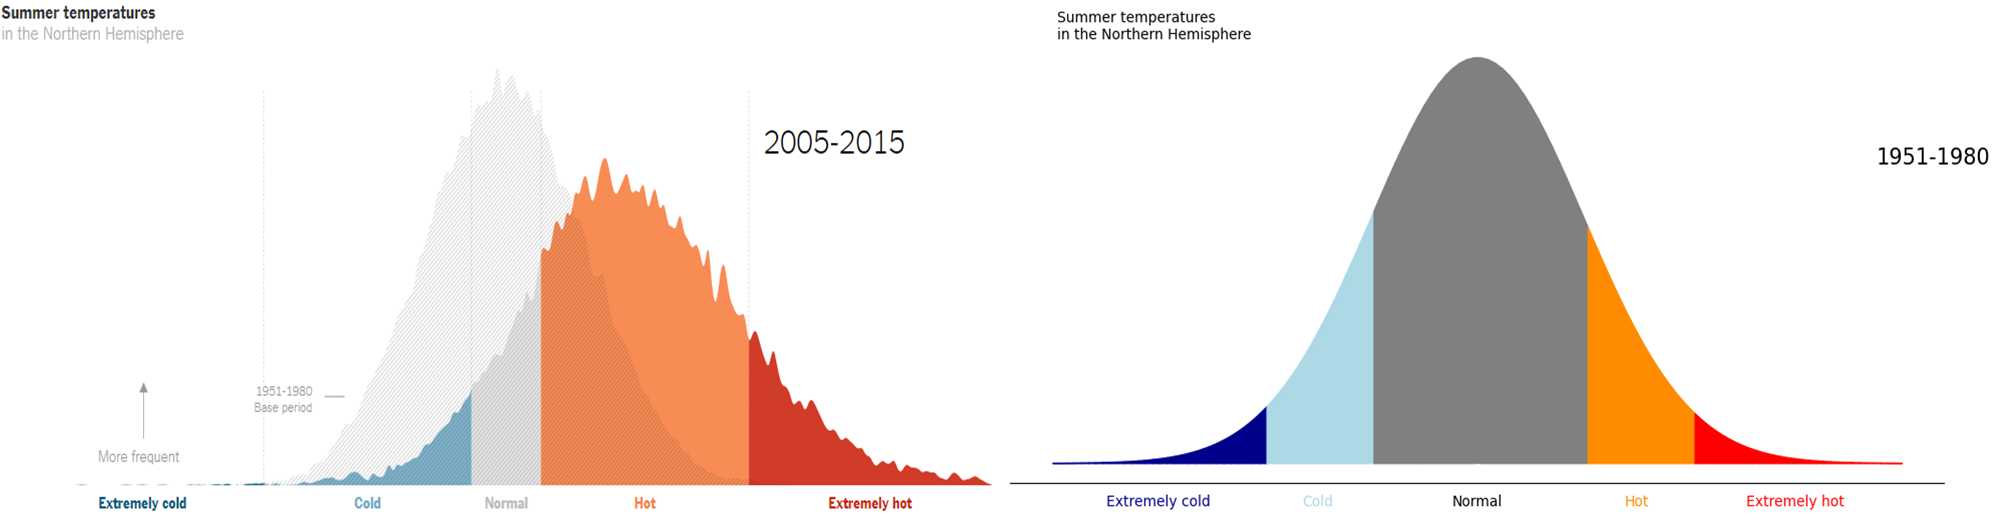